## Steps in the Code

1. **Defining the Unit Circle:**
   - The equation of the circle is given as \(x^2 + y^2 = 1\).
   - For the top half of the circle, the function is rearranged as:
     \[
     y = \sqrt{1 - x^2}
     \]

2. **Computing the Gradient:**
   - The gradient vector at a point \((x, y)\) is computed using the `derivative` function from SciPy.
   - Numerical derivatives for the partial derivatives with respect to \(x\) and \(y\) are calculated:
     \[
     \frac{\partial}{\partial x} \quad \text{and} \quad \frac{\partial}{\partial y}.
     \]
   - For simplicity, the gradient vector at the point \((1, 0)\) is manually defined as \([2, 0]\).

3. **Creating the Circle and Plot:**
   - The unit circle is parametrized using:
     \[
     x = \cos(\theta), \quad y = \sin(\theta)
     \]
     where \(\theta\) ranges from \(0\) to \(2\pi\).
   - The gradient vector is visualized as an arrow originating from the point \((1, 0)\).

4. **Visualization:**
   - The unit circle is plotted in blue.
   - The gradient vector is shown in purple.
   - The point \((1, 0)\) is highlighted in red.

---

<ipython-input-4-d72d1d6981f3>:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  grad_x = derivative(func_x, x_val, dx=1e-6, args=(y_val,))
<ipython-input-4-d72d1d6981f3>:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  grad_y = derivative(func_y, y_val, dx=1e-6, args=(x_val,))


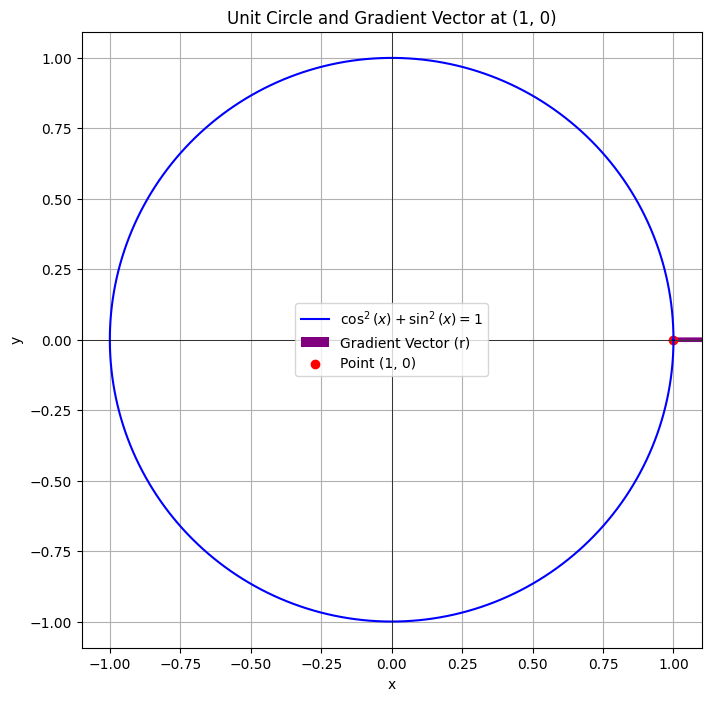

In [ ]:
from scipy.misc import derivative
import matplotlib.pyplot as plt

# Define the function for the circle: x^2 + y^2 = 1
# Rearrange to y = sqrt(1 - x^2) for the top half of the circle
def circle_top_half(x):
    return np.sqrt(1 - x**2)

# Compute the gradient using numerical derivatives from SciPy
x_val = 1.0  # Point on the circle (x, y)
y_val = circle_top_half(x_val)

# Define the function for the x-component
def func_x(x, y_fixed):
    return x**2 + y_fixed**2

# Define the function for the y-component
def func_y(y, x_fixed):
    return x_fixed**2 + y**2

# Compute the partial derivatives
grad_x = derivative(func_x, x_val, dx=1e-6, args=(y_val,))
grad_y = derivative(func_y, y_val, dx=1e-6, args=(x_val,))

# Gradient vector at (1, 0)
gradient_vector = np.array([grad_x, grad_y])

# Compute dot product of gradient with itself
dot_product_scipy = np.dot(gradient_vector, gradient_vector)

# Define the unit circle
theta = np.linspace(0, 2 * np.pi, 500)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Point and gradient vector
point = np.array([1, 0])
gradient_vector = np.array([2, 0])

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(x_circle, y_circle, label=r"$\cos^2(x) + \sin^2(x) = 1$", color="blue")
plt.quiver(
    *point,
    *gradient_vector,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="purple",
    label="Gradient Vector (r)"
)
plt.scatter(1, 0, color="red", label="Point (1, 0)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unit Circle and Gradient Vector at (1, 0)")
plt.legend()
plt.axis("equal")
plt.show()



### Electric Field
The electric field \(\vec{E}\) produced by a point charge \(Q\) at a location \((x, y)\) is given by:
\[
\vec{E} = \frac{Q}{4\pi \epsilon_0 r^2} \hat{r},
\]
where:
- \(r\) is the distance from the charge to the point where the field is being calculated,
- \(\hat{r}\) is the unit vector pointing from the charge to the point of interest.

For this simulation:
1. There are two charges of equal magnitude but opposite polarity:
   - A positive charge at \((-1, 0)\),
   - A negative charge at \((1, 0)\).
2. The electric field contributions from each charge are summed to calculate the resultant field at every point in the 2D grid.

---

### Field Components
The total electric field \(\vec{E}\) is computed as the vector sum of the fields from the two charges:
\[
\vec{E} = \vec{E}_1 + \vec{E}_2,
\]
where \(\vec{E}_1\) and \(\vec{E}_2\) are the fields due to the charges at \((-1, 0)\) and \((1, 0)\), respectively.

#### Field Contribution from a Single Charge
For a charge located at \((x_q, y_q)\), the electric field components are:
\[
E_x = \frac{x - x_q}{(x - x_q)^2 + (y - y_q)^2},
\]
\[
E_y = \frac{y - y_q}{(x - x_q)^2 + (y - y_q)^2}.
\]

#### Total Field
For this problem:
- The first charge is at \((-1, 0)\), contributing:
  \[
  E_{x1} = \frac{X + 1}{(X + 1)^2 + Y^2}, \quad E_{y1} = \frac{Y}{(X + 1)^2 + Y^2}.
  \]
- The second charge is at \((1, 0)\), contributing:
  \[
  E_{x2} = \frac{X - 1}{(X - 1)^2 + Y^2}, \quad E_{y2} = \frac{Y}{(X - 1)^2 + Y^2}.
  \]

The resultant field components are:
\[
E_x = E_{x1} - E_{x2}, \quad E_y = E_{y1} - E_{y2}.
\]

---

## Python Implementation
The Python code performs the following steps:

1. **Define the 2D Grid**:
   - A mesh grid is created using `np.meshgrid` to represent the \(x\) and \(y\) coordinates in the 2D plane.

2. **Compute Field Components**:
   - The `Ex` and `Ey` arrays store the \(x\)- and \(y\)-components of the electric field at each point in the grid.
   - The field is calculated using the equations derived above.

3. **Stream Plot Visualization**:
   - The `plt.streamplot` function visualizes the electric field as streamlines.
   - The charges are marked as red (\(-1, 0\)) and green (\(1, 0\)) points.

---

## Visualization
1. **Field Lines**:
   - The streamlines represent the direction of the electric field at various points.
   - Field lines begin at the positive charge (\(-1, 0\)) and terminate at the negative charge (\(1, 0\)).

2. **Charge Positions**:
   - The charges are highlighted:
     - Red for the positive charge (\(-1, 0\)).
     - Green for the negative charge (\(1, 0\)).

---

## Output
The resulting plot displays:
- The electric field's flow from the positive charge to the negative charge.
- Denser lines near the charges, representing stronger field magnitudes.

This visualization aids in understanding the behavior of the electric field in a simple dipole configuration.


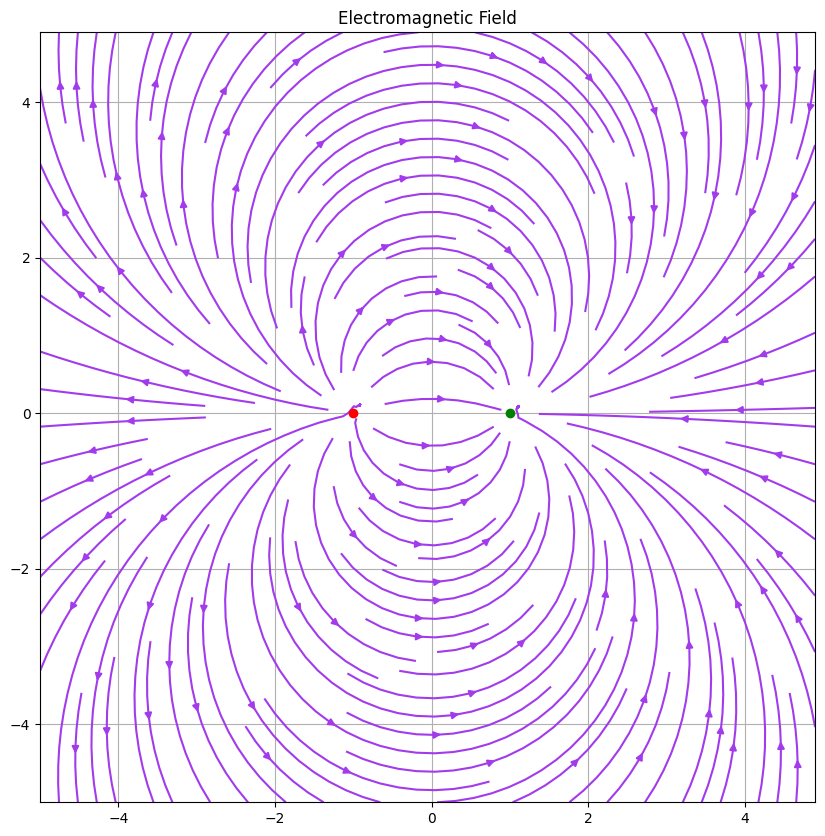

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1D arrays
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)

# Meshgrid
X,Y = np.meshgrid(x,y)

# Assign vector directions
Ex = (X + 1)/((X+1)**2 + Y**2) - (X - 1)/((X-1)**2 + Y**2)
Ey = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)

# Depict illustration
plt.figure(figsize=(10, 10))
plt.streamplot(X,Y,Ex,Ey, density=1.4, linewidth=None, color='#A23BEC')
plt.plot(-1,0,'-or')
plt.plot(1,0,'-og')
plt.title('Electromagnetic Field')

# Show plot with grid
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Define the vectors
A = np.array([1, 4, -5])
B = np.array([0, -2, 7])
S = np.array([0, 1, -6])

# (a) A . (B x S)
B_cross_S = np.cross(B, S)  # Compute B x S
A_dot_B_cross_S = np.dot(A, B_cross_S)  # Compute A . (B x S)
print(f"(a) A . (B x S) = {A_dot_B_cross_S}")

# (b) A x (B x S)
A_cross_B_cross_S = np.cross(A, B_cross_S)  # Compute A x (B x S)
print(f"(b) A x (B x S) = {A_cross_B_cross_S}")

# (c) Component of A along S
S_magnitude_squared = np.dot(S, S)  # |S|^2
A_dot_S = np.dot(A, S)  # A . S
Proj_A_on_S = (A_dot_S / S_magnitude_squared) * S  # Projection formula
print(f"(c) Component of A along S (Projection) = {Proj_A_on_S}")


(a) A . (B x S) = 5
(b) A x (B x S) = [  0 -25 -20]
(c) Component of A along S (Projection) = [ 0.          0.91891892 -5.51351351]


In [ ]:
import numpy as np

# Define unit vectors in Cartesian coordinates
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])

# (1) e_x . e_z
dot_ex_ez = np.dot(e_x, e_z)
print(f"(1) e_x . e_z = {dot_ex_ez}")

# (2) e_x x e_z
cross_ex_ez = np.cross(e_x, e_z)
print(f"(2) e_x x e_z = {cross_ex_ez}")

# Define unit vectors in spherical coordinates (r, theta, phi)
e_r = np.array([1, 0, 0])      # Example: points radially outwards
e_phi = np.array([0, 1, 0])    # Example: azimuthal direction
e_theta = np.array([0, 0, 1])  # Example: polar direction

# (3) e_rho x e_rho
cross_erho_erho = np.cross(e_r, e_r)
print(f"(3) e_rho x e_rho = {cross_erho_erho}")

# (4) e_r x e_phi
cross_er_ephi = np.cross(e_r, e_phi)
print(f"(4) e_r x e_phi = {cross_er_ephi}")

# (5) e_phi x e_theta
cross_ephi_etheta = np.cross(e_phi, e_theta)
print(f"(5) e_phi x e_theta = {cross_ephi_etheta}")


(1) e_x . e_z = 0
(2) e_x x e_z = [ 0 -1  0]
(3) e_rho x e_rho = [0 0 0]
(4) e_r x e_phi = [0 0 1]
(5) e_phi x e_theta = [1 0 0]


### Equations Used in the Code

This markdown provides a detailed explanation of the mathematical equations used in the code to calculate the areas for cylindrical and spherical geometries.

---

#### (a) **Cylindrical Geometry**
The cylinder is described in cylindrical coordinates, defined by:

- Radius: \( \rho \)
- Azimuthal angle: \( \phi \)
- Height: \( z \)

**Coordinate Transformations**:
The cylindrical coordinates are converted to Cartesian coordinates using the following equations:
\[
X = \rho \cdot \cos(\phi)
\]
\[
Y = \rho \cdot \sin(\phi)
\]
\[
Z = z
\]

**Surface Area Calculations**:

1. **Lateral Surface Area**:
The lateral surface area of the cylindrical section is given by:
\[
A_{\text{lateral}} = \rho \cdot (\Delta \phi) \cdot (\Delta z)
\]
where:
- \( \rho \): Radius of the cylinder
- \( \Delta \phi \): Azimuthal angle range \( \phi_{\text{max}} - \phi_{\text{min}} \)
- \( \Delta z \): Height range \( z_{\text{max}} - z_{\text{min}} \)

2. **Base Area**:
Each circular segment at the top and bottom of the cylinder contributes an area:
\[
A_{\text{base}} = \rho^2 \cdot \Delta \phi
\]
Since there are two bases:
\[
A_{\text{total\ base}} = 2 \cdot A_{\text{base}} = 2 \cdot \rho^2 \cdot \Delta \phi
\]

3. **Total Surface Area**:
The total area is the sum of the lateral and base areas:
\[
A_{\text{total}} = A_{\text{lateral}} + A_{\text{total\ base}}
\]

---

#### (b) **Spherical Geometry**
The sphere is described in spherical coordinates, defined by:

- Radius: \( r \)
- Azimuthal angle: \( \phi \) (ranging from 0 to \( 2\pi \))
- Polar angle: \( \theta \) (ranging from 0 to \( \pi/3 \))

**Coordinate Transformations**:
The spherical coordinates are converted to Cartesian coordinates using the following equations:
\[
X = r \cdot \sin(\theta) \cdot \cos(\phi)
\]
\[
Y = r \cdot \sin(\theta) \cdot \sin(\phi)
\]
\[
Z = r \cdot \cos(\theta)
\]

**Surface Area Calculations**:

The surface area of the spherical cap is given by:
\[
A_{\text{cap}} = 2 \pi r^2 \cdot \left(1 - \cos(\theta_{\text{max}})\right)
\]
where:
- \( r \): Radius of the sphere
- \( \theta_{\text{max}} \): Maximum polar angle defining the cap

---

#### Results
The code calculates and outputs:

- **Cylindrical Geometry**:
  - Lateral surface area
  - Base area
  - Total surface area

- **Spherical Geometry**:
  - Cap area

These calculations are visualized with 3D plots for better understanding.


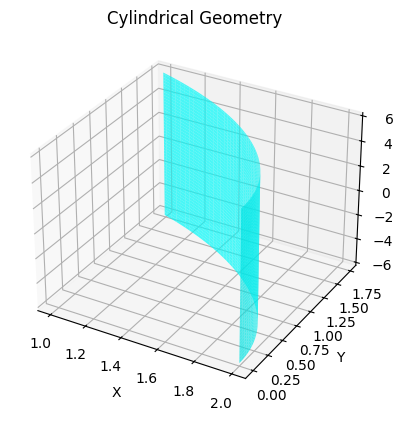

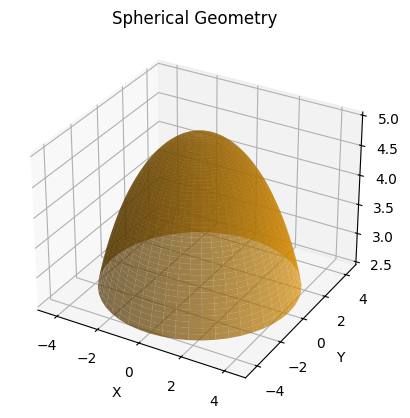

                          Area (units²)
Cylindrical Lateral Area       8.377580
Cylindrical Base Area          4.188790
Cylindrical Total Area        12.566371
Spherical Cap Area            78.539816


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualization and Calculations for Problem

# (a) Cylindrical Geometry
def plot_cylindrical():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Parameters for cylinder
    rho = 2
    z = np.linspace(-6, 6, 100)
    phi = np.linspace(0, np.pi / 3, 100)

    # Create meshgrid for cylindrical coordinates
    Z, PHI = np.meshgrid(z, phi)
    X = rho * np.cos(PHI)
    Y = rho * np.sin(PHI)

    # Plot cylinder
    ax.plot_surface(X, Y, Z, alpha=0.7, color='cyan')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Cylindrical Geometry")
    plt.show()

    # Area Calculations for cylinder
    lateral_area = rho * (np.pi / 3) * 4  # Lateral surface area
    base_area = rho**2 * (np.pi / 3)      # Area of the base (two circular segments)
    total_area = lateral_area + base_area
    return lateral_area, base_area, total_area

# (b) Spherical Geometry
def plot_spherical():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Parameters for sphere
    r = 10
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi / 3, 100)

    # Create meshgrid for spherical coordinates
    PHI, THETA = np.meshgrid(phi, theta)
    X = r * np.sin(THETA) * np.cos(PHI)
    Y = r * np.sin(THETA) * np.sin(PHI)
    Z = r * np.cos(THETA)

    # Plot spherical cap
    ax.plot_surface(X, Y, Z, alpha=0.7, color='orange')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Spherical Geometry")
    plt.show()

    # Area Calculation for spherical cap
    cap_area = 2 * np.pi * r**2 * (1 - np.cos(np.pi / 3))  # Spherical cap surface area
    return cap_area

# Calculate and display areas
lateral_area, base_area, total_cylindrical_area = plot_cylindrical()
spherical_cap_area = plot_spherical()

results = {
    "Cylindrical Lateral Area": lateral_area,
    "Cylindrical Base Area": base_area,
    "Cylindrical Total Area": total_cylindrical_area,
    "Spherical Cap Area": spherical_cap_area,
}

import pandas as pd

results_df = pd.DataFrame.from_dict(results, orient='index', columns=["Area (units²)"])
print(results_df)

In [ ]:
import numpy as np

# Define the point P1 in Cartesian coordinates
x, y, z = 1, -1, 2

# Define the vector F in Cartesian coordinates
F_x = y*3
F_y = x * z
F_z = 4

F = np.array([F_x, F_y, F_z])

# Convert to spherical coordinates
r = np.sqrt(x**2 + y**2 + z**2)
theta = np.arccos(z / r)
phi = np.arctan2(y, x)

# Define spherical unit vectors in Cartesian coordinates
e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
e_phi = np.array([-np.sin(phi), np.cos(phi), 0])

# Compute F_r, F_theta, and F_phi
F_r = np.dot(F, e_r)
F_theta = np.dot(F, e_theta)
F_phi = np.dot(F, e_phi)

# Print results
print(f"Point P1 in spherical coordinates: r = {r:.2f}, theta = {theta:.2f}, phi = {phi:.2f}")
print(f"Vector components in spherical coordinates:")
print(f"F_r = {F_r:.2f}")
print(f"F_theta = {F_theta:.2f}")
print(f"F_phi = {F_phi:.2f}")


Point P1 in spherical coordinates: r = 2.45, theta = 0.62, phi = -0.79
Vector components in spherical coordinates:
F_r = 1.22
F_theta = -5.20
F_phi = -0.71


In [10]:
import math

def electric_potential(k, q, r):
    """
    Calculate electric potential due to a single point charge.

    Parameters:
    k (float): Coulomb's constant (N·m²/C²)
    q (float): Charge (Coulombs)
    r (float): Distance from charge to point (meters)

    Returns:
    float: Electric potential (Volts)
    """
    return k * q / r

# Constants
k = 8.988e9  # Coulomb's constant in N·m²/C²
q = -3e-6    # Charge in Coulombs (-3 microCoulombs)
a = 5.0      # Side length of the equilateral triangle in meters

# Calculate the height (h) of the equilateral triangle
h = (math.sqrt(3) / 2) * a
print(f"Height of the triangle (h): {h:.3f} m")

# Distances
r_A_M = a / 2      # Distance from charges A and B to midpoint M
r_C_M = h          # Distance from charge C to midpoint M
r_A_C = a          # Distance from charges A and B to vertex C

# Calculate electric potentials at point M
V_A_M = electric_potential(k, q, r_A_M)  # Potential due to charge A at M
V_B_M = electric_potential(k, q, r_A_M)  # Potential due to charge B at M
V_C_M = electric_potential(k, q, r_C_M)  # Potential due to charge C at M

V_total_M = V_A_M + V_B_M + V_C_M
print(f"Electric potential at midpoint M: {V_total_M:.2f} V")

# Calculate electric potentials at point C
V_A_C = electric_potential(k, q, r_A_C)  # Potential due to charge A at C
V_B_C = electric_potential(k, q, r_A_C)  # Potential due to charge B at C
# Potential due to charge C at C is theoretically infinite and excluded

V_total_C = V_A_C + V_B_C
print(f"Electric potential at vertex C: {V_total_C:.2f} V")

# Calculate the potential difference ΔV = V(C) - V(M)
delta_V = V_total_C - V_total_M
print(f"Electric potential difference ΔV = V(C) - V(M): {delta_V:.2f} V")



Height of the triangle (h): 4.330 m
Electric potential at midpoint M: -27798.27 V
Electric potential at vertex C: -10785.60 V
Electric potential difference ΔV = V(C) - V(M): 17012.67 V
